In [12]:
from scipy.stats import ttest_ind, ttest_rel
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.graphics.factorplots import interaction_plot

### Caffeine

1)

In [14]:
married = [652, 1537, 598, 242]
prev_mar = [36, 46, 38, 21]
single = [218, 327, 106, 67]

2)

In [15]:
caffeine = np.array([married, prev_mar, single])
columns = ["0", "1-150", "151-300", ">300"]
rows = ["married", "divorced", "single"]

caffeine_df = pd.DataFrame(caffeine, index=rows, columns=columns)
caffeine_df

,0,1-150,151-300,>300
married,652,1537,598,242
divorced,36,46,38,21
single,218,327,106,67


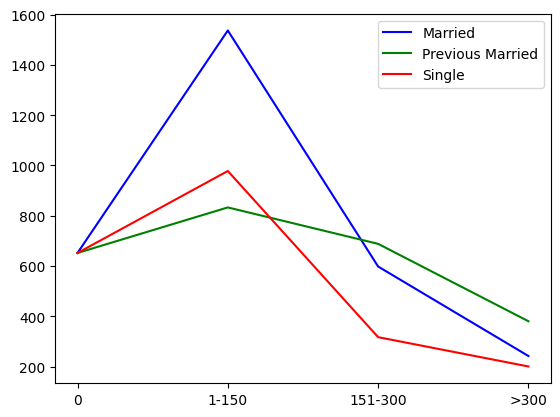

In [9]:
# y number of people in that one
# x is coffeine consumption
# type is marital status

colors = ["blue", "green", "red"]
labels = ["Married", "Previous Married", "Single"]
for i, lst in enumerate([married, prev_mar, single]):
    x = ["0", "1-150", "151-300", ">300"]
    plt.plot(x, lst, color=colors[i], label = labels[i])

plt.legend()
plt.show()

In [16]:
chi2, p, _, _ = stats.chi2_contingency(caffeine)
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 51.655638946977184
P-value: 2.187077993065653e-09


3)

In [17]:
normalized_caffeine = 100 * caffeine / caffeine.sum(axis=1)[:, np.newaxis]
rounded_caffeine = np.round(normalized_caffeine, decimals=3)
print(rounded_caffeine)

[[21.525 50.743 19.742  7.989]
 [25.532 32.624 26.95  14.894]
 [30.362 45.543 14.763  9.331]]


4)

In [ ]:
# Continous + categorical + number of participants

In [ ]:
# Parametric: ANCOVA / ANOVA
# Non-parametric: Kruskal-wallis

5)

In [18]:
# two-way anova would require two independent and one explanatory variables. 

### Fertilizer

In [20]:
import statsmodels.api as sm

1)

In [23]:
yield_data = [10.3, 10.3, -4.95, -4.65, -6, -11]
fert_data = ["a", "b", "a", "b", "a", "b"]
field_data = ["a", "a", "b", "b", "c", "c"]

fertilizer_data = pd.DataFrame({'yield_value': yield_data, 'fertilizer': fert_data, 'field': field_data})
fertilizer_data['fertilizer'] = pd.Categorical(fertilizer_data['fertilizer'])
fertilizer_data['field'] = pd.Categorical(fertilizer_data['field'])

fertilizer_data

,yield_value,fertilizer,field
0,10.30,a,a
1,10.30,b,a
2,-4.95,a,b
3,-4.65,b,b
4,-6.00,a,c
5,-11.00,b,c


2)

In [24]:
L = sm.OLS.from_formula('yield_value ~ fertilizer + field', data=fertilizer_data).fit()

In [26]:
anova_table = sm.stats.anova_lm(L)
print(anova_table)

             df      sum_sq     mean_sq          F    PR(>F)
fertilizer  1.0    3.681667    3.681667   0.830763  0.458265
field       2.0  396.760000  198.380000  44.764197  0.021851
Residual    2.0    8.863333    4.431667        NaN       NaN


In [27]:
drop1_table = sm.stats.anova_lm(L, test='F', typ=1).iloc[1:]
print(drop1_table)

           df      sum_sq     mean_sq          F    PR(>F)
field     2.0  396.760000  198.380000  44.764197  0.021851
Residual  2.0    8.863333    4.431667        NaN       NaN


In [35]:
L = sm.OLS.from_formula('yield_value ~ field', data=fertilizer_data).fit()
anova_table = sm.stats.anova_lm(L)
print(anova_table)

           df   sum_sq     mean_sq          F    PR(>F)
field     2.0  396.760  198.380000  47.440415  0.005366
Residual  3.0   12.545    4.181667        NaN       NaN


3)

In [33]:
L_interaction = sm.OLS.from_formula('yield_value ~ fertilizer : field', data=fertilizer_data).fit()
print(L_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:            yield_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 03 Jan 2024   Prob (F-statistic):                nan
Time:                        10:30:16   Log-Likelihood:                 187.72
No. Observations:                   6   AIC:                            -363.4
Df Residuals:                       0   BIC:                            -364.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


### Filter

In [39]:
filter_data = pd.read_csv("filter.txt", sep="\t")
filter_data

,NOISE,SIZE,TYPE,SIDE
0,810,1,1,1
1,820,1,1,1
2,820,1,1,1
3,840,2,1,1
4,840,2,1,1
5,845,2,1,1
6,785,3,1,1
7,790,3,1,1
8,785,3,1,1
9,835,1,1,2


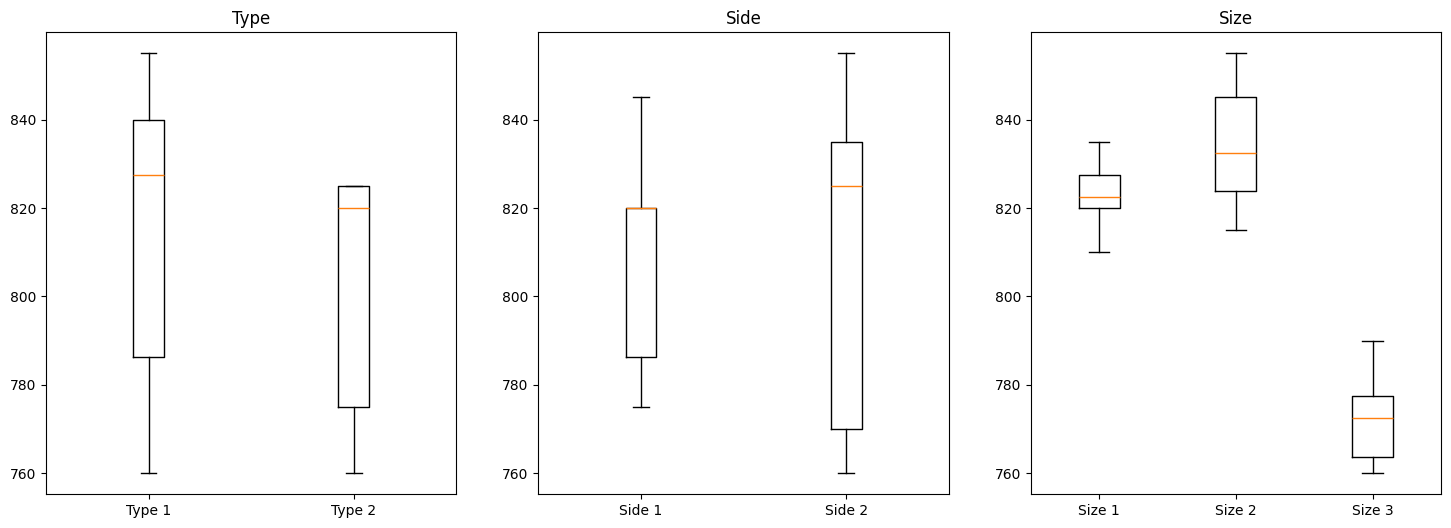

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

ax = axs[0]
type1 = filter_data[filter_data["TYPE"] == 1]["NOISE"].values
type2 = filter_data[filter_data["TYPE"] == 2]["NOISE"].values
ax.boxplot([type1, type2], labels=['Type 1', 'Type 2'])
ax.set_title('Type')

ax = axs[1]
type1 = filter_data[filter_data["SIDE"] == 1]["NOISE"].values
type2 = filter_data[filter_data["SIDE"] == 2]["NOISE"].values
ax.boxplot([type1, type2], labels=['Side 1', 'Side 2'])
ax.set_title('Side')

ax = axs[2]
type1 = filter_data[filter_data["SIZE"] == 1]["NOISE"].values
type2 = filter_data[filter_data["SIZE"] == 2]["NOISE"].values
type3 = filter_data[filter_data["SIZE"] == 3]["NOISE"].values
ax.boxplot([type1, type2, type3], labels=['Size 1', 'Size 2', 'Size 3'])
ax.set_title('Size')
plt.show()

2)

In [47]:
L = sm.OLS.from_formula('NOISE ~ TYPE', data=filter_data).fit()
anova_table = sm.stats.anova_lm(L)
print(anova_table)

            df        sum_sq      mean_sq         F    PR(>F)
TYPE       1.0   1056.250000  1056.250000  1.246181  0.272111
Residual  34.0  28818.055556   847.589869       NaN       NaN


In [48]:
L = sm.OLS.from_formula('NOISE ~ SIDE', data=filter_data).fit()
anova_table = sm.stats.anova_lm(L)
print(anova_table)

            df        sum_sq     mean_sq        F    PR(>F)
SIDE       1.0      0.694444    0.694444  0.00079  0.977736
Residual  34.0  29873.611111  878.635621      NaN       NaN


In [49]:
L = sm.OLS.from_formula('NOISE ~ SIZE', data=filter_data).fit()
anova_table = sm.stats.anova_lm(L)
print(anova_table)

            df        sum_sq       mean_sq           F        PR(>F)
SIZE       2.0  26051.388889  13025.694444  112.439782  1.849697e-15
Residual  33.0   3822.916667    115.845960         NaN           NaN


In [50]:
L = sm.OLS.from_formula('NOISE ~ SIZE + TYPE', data=filter_data).fit()
anova_table = sm.stats.anova_lm(L)
print(anova_table)

            df        sum_sq       mean_sq           F        PR(>F)
SIZE       2.0  26051.388889  13025.694444  150.658635  5.208044e-17
TYPE       1.0   1056.250000   1056.250000   12.216867  1.410666e-03
Residual  32.0   2766.666667     86.458333         NaN           NaN


3)

In [55]:
L = sm.OLS.from_formula('NOISE ~ SIZE : TYPE', data=filter_data).fit()
print(L.summary())

                            OLS Regression Results                            
Dep. Variable:                  NOISE   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     85.34
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           8.20e-17
Time:                        10:49:44   Log-Likelihood:                -123.05
No. Observations:                  36   AIC:                             258.1
Df Residuals:                      30   BIC:                             267.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           825.8333      3.30

In [56]:
drop1_result = sm.stats.anova_lm(L_interaction, test='F')
print(drop1_result)

                   df        sum_sq  mean_sq    F  PR(>F)
fertilizer:field  5.0  4.093050e+02   81.861  0.0     NaN
Residual          0.0  2.342917e-28      inf  NaN     NaN


/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))


In [68]:
filter_data2 = filter_data.drop(columns=["SIDE"])
chi2, p, _, _ = stats.chi2_contingency(filter_data2)
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

Chi-squared value: 20.120140575275627
P-value: 0.9999999992946239


<Figure size 800x600 with 0 Axes>

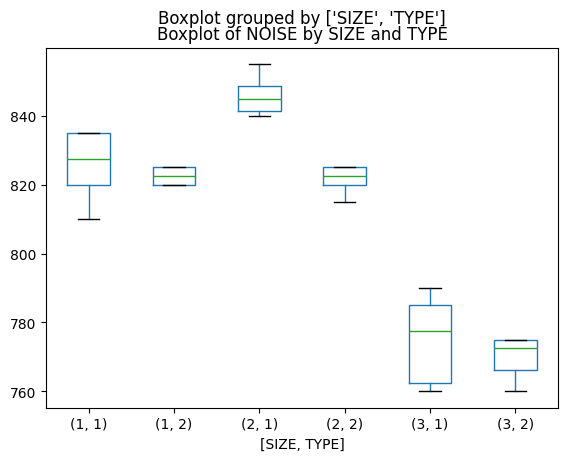

In [57]:
plt.figure(figsize=(8, 6))
filter_data.boxplot(column='NOISE', by=['SIZE', 'TYPE'], grid=False)
plt.title('Boxplot of NOISE by SIZE and TYPE')
plt.show()

In [119]:
formula_interaction_all = 'NOISE ~ SIZE * SIDE * TYPE'
L_interaction_all = sm.OLS.from_formula(formula_interaction_all, data=filter_data).fit()
drop1_result_all = sm.stats.anova_lm(L_interaction_all, test='F')
print(drop1_result_all)

                  df        sum_sq       mean_sq           F        PR(>F)
SIZE             2.0  26051.388889  13025.694444  893.190476  2.946424e-23
SIDE             1.0      0.694444      0.694444    0.047619  8.291042e-01
TYPE             1.0   1056.250000   1056.250000   72.428571  1.037873e-08
SIZE:SIDE        2.0   1293.055556    646.527778   44.333333  8.729504e-09
SIZE:TYPE        2.0    804.166667    402.083333   27.571429  6.047755e-07
SIDE:TYPE        1.0     17.361111     17.361111    1.190476  2.860667e-01
SIZE:SIDE:TYPE   2.0    301.388889    150.694444   10.333333  5.790717e-04
Residual        24.0    350.000000     14.583333         NaN           NaN


In [120]:
formula_without_interactions = 'NOISE ~ SIZE + SIDE + TYPE'
L_without_interactions = sm.OLS.from_formula(formula_without_interactions, data=filter_data).fit()
drop1_result_without_interactions = sm.stats.anova_lm(L_without_interactions, test='F')
print(drop1_result_without_interactions)

            df        sum_sq       mean_sq           F        PR(>F)
SIZE       2.0  26051.388889  13025.694444  145.987196  1.674946e-16
SIDE       1.0      0.694444      0.694444    0.007783  9.302679e-01
TYPE       1.0   1056.250000   1056.250000   11.838062  1.679417e-03
Residual  31.0   2765.972222     89.224910         NaN           NaN


### Case: Fish

In [121]:
data = [el.split() for el in open("fishgrazer.txt").read().splitlines()]
columns = data[0]
df = pd.DataFrame(data[1:], columns=columns)
df

,cover,block,treat
0,14,1,C
1,23,1,C
2,22,2,C
3,35,2,C
4,67,3,C
...,...,...,...
91,17,6,LfF
92,5,7,LfF
93,14,7,LfF
94,5,8,LfF


In [122]:
df = df.astype({'cover': int, 'block': str, 'treat': str})

1)

<Axes: title={'center': 'cover'}, xlabel='[treat]'>

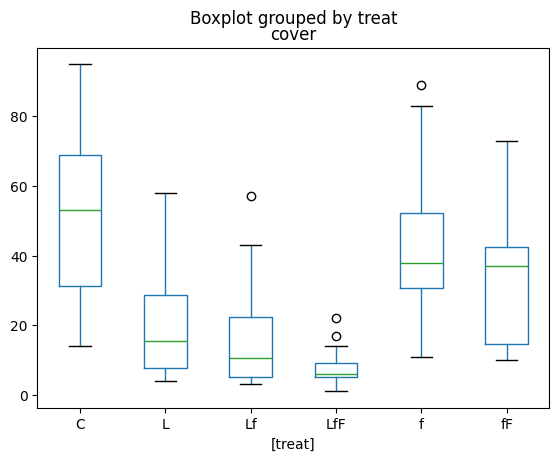

In [123]:
df.boxplot(column='cover', by=["treat"], grid=False)

<Axes: title={'center': 'cover'}, xlabel='[block]'>

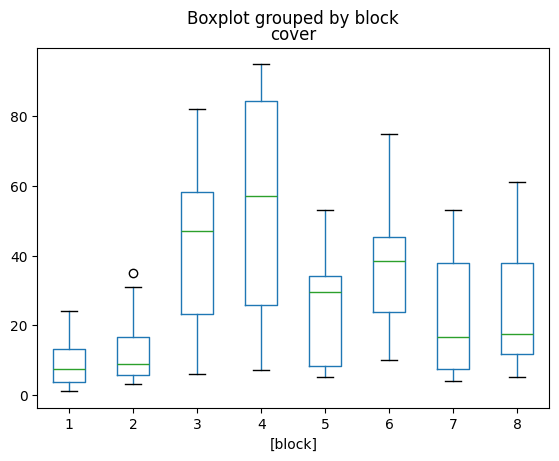

In [124]:
df.boxplot(column='cover', by=["block"], grid=False)

2)

In [125]:
formula_without_interactions = 'cover ~ block * treat'
L_without_interactions = sm.OLS.from_formula(formula_without_interactions, data=df).fit()
drop1_result_without_interactions = sm.stats.anova_lm(L_without_interactions, test='F')
print(drop1_result_without_interactions)

               df   sum_sq      mean_sq          F        PR(>F)
block         7.0  19105.5  2729.357143  30.545382  1.296285e-15
treat         5.0  23045.5  4609.100000  51.582374  3.705381e-18
block:treat  35.0   6612.5   188.928571   2.114379  8.128342e-03
Residual     48.0   4289.0    89.354167        NaN           NaN


max value:  17.99999999999929


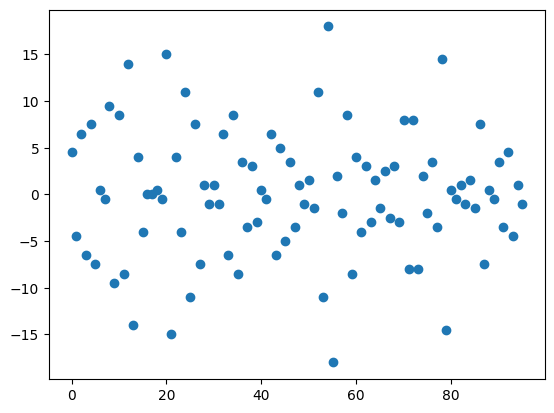

In [126]:
predictions = L_without_interactions.predict(df)
residuals = predictions.values - df["cover"].values
print("max value: ", max(residuals))
plt.scatter(range(len(residuals)), residuals)
plt.show()

In [128]:
df["cover_log"] = np.log(df["cover"])
formula_without_interactions = 'cover_log ~ block * treat'
L_without_interactions = sm.OLS.from_formula(formula_without_interactions, data=df).fit()
drop1_result_without_interactions = sm.stats.anova_lm(L_without_interactions, test='F').round(3)
print(drop1_result_without_interactions)

               df  sum_sq  mean_sq       F  PR(>F)
block         7.0  34.324    4.903  28.349   0.000
treat         5.0  48.695    9.739  56.305   0.000
block:treat  35.0   6.309    0.180   1.042   0.442
Residual     48.0   8.302    0.173     NaN     NaN


max value:  0.6454920906577466


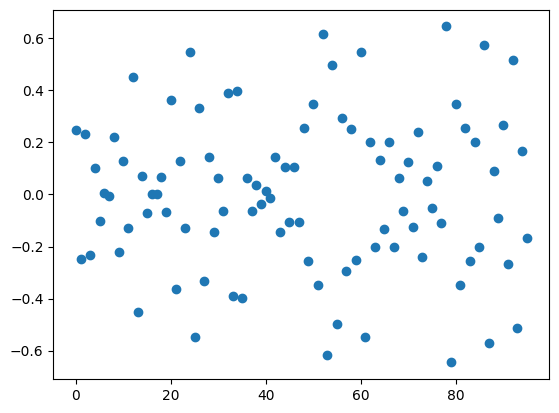

In [114]:
predictions = L_without_interactions.predict(df)
residuals = predictions.values - df["cover"].values
print("max value: ", max(residuals))
plt.scatter(range(len(residuals)), residuals)
plt.show()

### Poison

In [138]:
df = pd.read_csv("Poison.txt", sep=" ")
df

,Poison,Treatment,Time,invTime
1,low,A,0.31,3.225806
2,low,A,0.45,2.222222
3,low,A,0.46,2.173913
4,low,A,0.43,2.325581
5,low,B,0.82,1.219512
6,low,B,1.10,0.909091
7,low,B,0.88,1.136364
8,low,B,0.72,1.388889
9,low,C,0.43,2.325581
10,low,C,0.45,2.222222


1)

<Axes: title={'center': 'invTime'}, xlabel='Poison'>

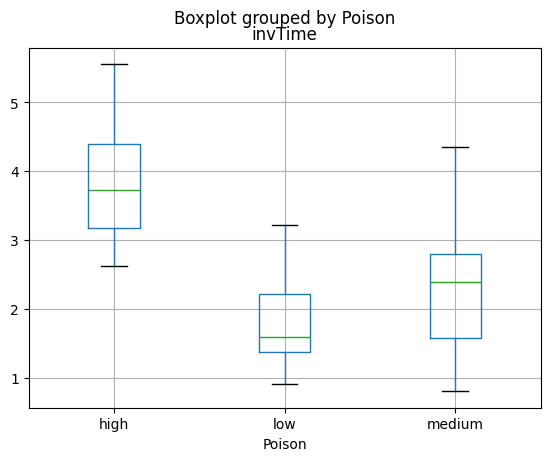

In [139]:
df.boxplot(column="invTime", by="Poison")

<Axes: title={'center': 'invTime'}, xlabel='Treatment'>

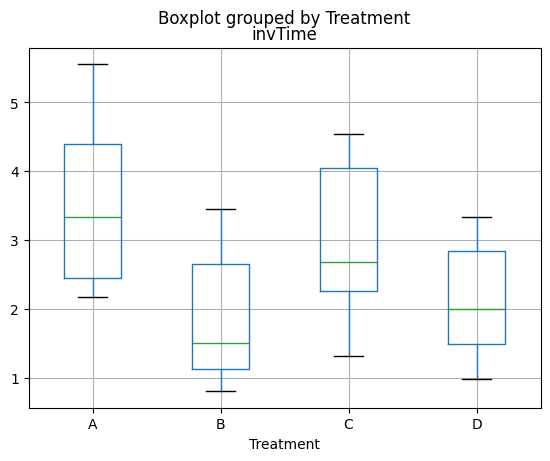

In [140]:
df.boxplot(column="invTime", by="Treatment")

In [143]:
posion = df["Poison"].values
treatment = df["Treatment"].values
invTime = df["invTime"].values

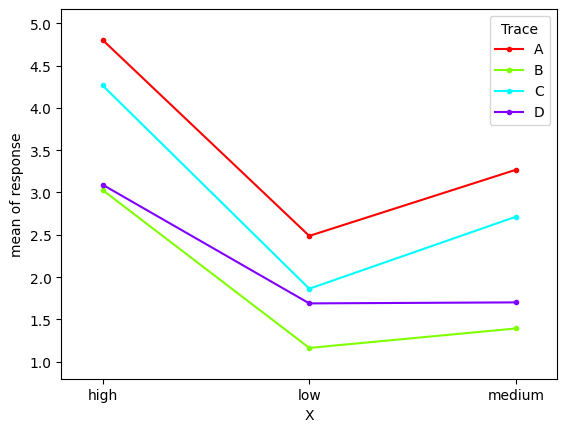

In [146]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(posion, treatment, invTime)
plt.show()

In [147]:
formula_without_interactions = 'invTime ~ Poison * Treatment'
L_without_interactions = sm.OLS.from_formula(formula_without_interactions, data=df).fit()
drop1_result_without_interactions = sm.stats.anova_lm(L_without_interactions, test='F').round(3)
print(drop1_result_without_interactions)

                    df  sum_sq  mean_sq       F  PR(>F)
Poison             2.0  34.877   17.439  72.635   0.000
Treatment          3.0  20.414    6.805  28.343   0.000
Poison:Treatment   6.0   1.571    0.262   1.090   0.387
Residual          36.0   8.643    0.240     NaN     NaN
